In [ ]:
pip install tensorflow==2.13.0

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

In [ ]:
#!wget https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/cuda-wsl-ubuntu.pin
#!mv cuda-wsl-ubuntu.pin /etc/apt/preferences.d/cuda-repository-pin-600
#!wget https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda-repo-wsl-ubuntu-11-8-local_11.8.0-1_amd64.deb
!dpkg -i cuda-repo-wsl-ubuntu-11-8-local_11.8.0-1_amd64.deb
!cp /var/cuda-repo-wsl-ubuntu-11-8-local/cuda-*-keyring.gpg /usr/share/keyrings/
!apt-get update
!sudo apt-get -y install cuda

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Cloaning TFOD 2.0 github**

In [2]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 90405, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 90405 (delta 95), reused 171 (delta 86), pack-reused 90211
Receiving objects: 100% (90405/90405), 608.46 MiB | 28.55 MiB/s, done.
Resolving deltas: 100% (65113/65113), done.
Updating files: 100% (3700/3700), done.


In [3]:
cd /content/models/research

/content/models/research


In [4]:
!protoc object_detection/protos/*.proto --python_out=.

In [5]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 17.95 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [6]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [7]:
!make

python setup.py build_ext --inplace
running build_ext
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I../common -I/usr/include/python3.10 -c ../common/maskApi.c -o build/temp.linux-x86_64-cpython-310/../common/maskApi.o -Wno-cpp -

In [8]:
cp -r pycocotools /content/models/research

## Installing Object Detection **API**

In [9]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [10]:
cd ../..

/content/models/research


In [11]:
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... 

In [12]:
!python object_detection/builders/model_builder_tf2_test.py

2024-01-29 19:33:20.288091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 19:33:20.288155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 19:33:20.289720: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 19:33:20.298244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-29 19:33:21.777241: W tensorflow/compiler/tf2

## Getting a pretrained model

In [ ]:
cd /content/workspace/Vehicle_detection/pre-trained_models

/content/workspace/Vehicle_detection/pre-trained_models


In [ ]:
pwd

'/content/workspace/Vehicle_detection/pre-trained_models'

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz

--2024-01-29 12:29:04--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.130.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444343592 (424M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_incepti 100%[===================>] 423.76M  22.4MB/s    in 20s     

2024-01-29 12:29:25 (20.7 MB/s) - ‘faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz’ saved [444343592/444343592]



In [ ]:
!tar -xvf faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz

faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/saved_model/
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/saved_model/variables/variables.index


## Converting xml to csv and then tfrecord

In [ ]:
cd /content/workspace/Vehicle_detection

/content/workspace/Vehicle_detection


In [ ]:
!python xml_to_csv.py

Successfully converted xml to csv.


In [ ]:
#update generate_tfrecord befor this
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=/content/workspace/Vehicle_detection/annotations/test.record

2024-01-29 12:39:42.999951: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 12:39:43.000116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 12:39:43.001553: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 12:39:44.160870: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Successfully created the TFRecords: /content/workspace/Vehicle_detection/annotations/test.record


In [ ]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=/content/workspace/Vehicle_detection/annotations/train.record

2024-01-29 12:39:53.233792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 12:39:53.233845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 12:39:53.235116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 12:39:54.269301: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Successfully created the TFRecords: /content/workspace/Vehicle_detection/annotations/train.record


## Training model and exporting

In [ ]:
pwd

'/content/workspace/Vehicle_detection'

In [ ]:
cd /content/workspace/Vehicle_detection

/content/workspace/Vehicle_detection


In [ ]:
!python model_main_tf2.py --model_dir=/content/workspace/Vehicle_detection/models/Faster_R-CNN_Inception_ResNetV2 --pipeline_config_path=/content/workspace/Vehicle_detection/models/Faster_R-CNN_Inception_ResNetV2/pipeline.config

2024-01-29 13:06:44.520071: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-01-29 13:06:48.007081: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0129 13:06:48.008357 138011900539520 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0129 13:06:48.031466 138011900539520 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0129 13:06:48.031650 138011900539520 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0129 13:06:48.069633 138011900539520 dep

In [ ]:
pwd

'/content/workspace/Vehicle_detection'

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/workspace/Vehicle_detection/models/Faster_R-CNN_Inception_ResNetV2/pipeline.config --trained_checkpoint_dir /content/workspace/Vehicle_detection/models/Faster_R-CNN_Inception_ResNetV2 --output_directory /content/workspace/Vehicle_detection/exported_models/my_model

2024-01-29 17:30:02.983076: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 17:30:02.983138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 17:30:02.984616: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0129 17:30:09.002116 134599036777600 deprecation.py:50] From /usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph

## Inferencing trained model

In [13]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/workspace/Vehicle_detection/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/workspace/Vehicle_detection/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = '/content/workspace/Vehicle_detection/exported_models/my_model/saved_model'

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


Loading model...Done! Took 31.625377655029297 seconds


Running inference for /content/workspace/Vehicle_detection/images/test/82.jpg... Done


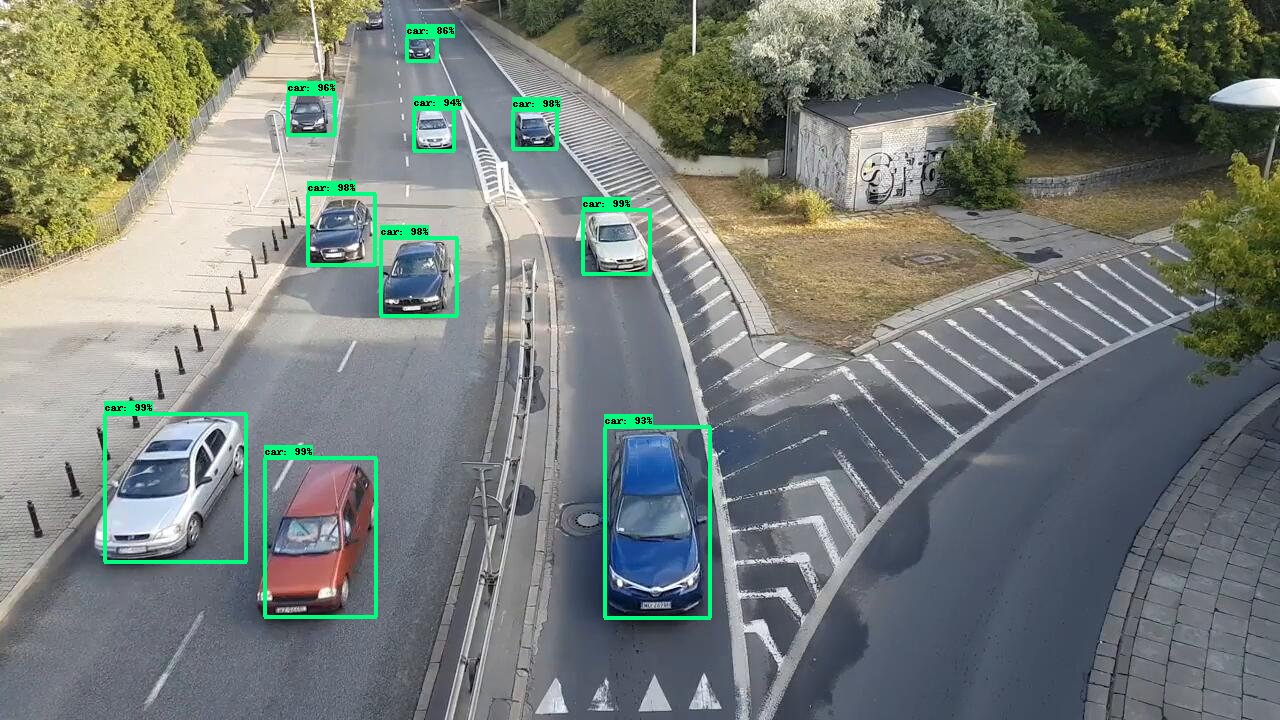

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/workspace/Vehicle_detection/images/test/82.jpg'


def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED
